## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [44]:

'''
(x_train, y_train), (x_test,y_test) = cifar10.load_data()
上面一行，等同下面三行
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test
'''

# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [12]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [32]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    model.add(Dense(512,
                   input_dim=x_train.shape[-1],
                   activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))    
    
    return model
model = build_mlp()

In [28]:
# 建立一個有三層隱藏層之神經網路
def build_mlp2():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp2()

In [33]:
"""
Compile 模型
"""
opt = keras.optimizers.adam(lr=0.001)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 10, 
          batch_size=256, 
          validation_split= 0.1
#           validation_data=(x_test, y_test), 
          shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 6s 142us/step - loss: 1.4603 - acc: 0.4886 - val_loss: 1.4874 - val_acc: 0.4854
Epoch 2/20
45000/45000 [==============================] - 6s 133us/step - loss: 1.4544 - acc: 0.4914 - val_loss: 1.5141 - val_acc: 0.4714
Epoch 3/20
45000/45000 [==============================] - 7s 166us/step - loss: 1.4529 - acc: 0.4912 - val_loss: 1.4774 - val_acc: 0.4826
Epoch 4/20
45000/45000 [==============================] - 7s 163us/step - loss: 1.4432 - acc: 0.4937 - val_loss: 1.4922 - val_acc: 0.4744
Epoch 5/20
45000/45000 [==============================] - 8s 180us/step - loss: 1.4436 - acc: 0.4946 - val_loss: 1.5094 - val_acc: 0.4736
Epoch 6/20
45000/45000 [==============================] - 8s 171us/step - loss: 1.4485 - acc: 0.4900 - val_loss: 1.5026 - val_acc: 0.4766
Epoch 7/20
45000/45000 [==============================] - 9s 203us/step - loss: 1.4342 - acc: 0.4988 - val_loss: 1.5347 - v

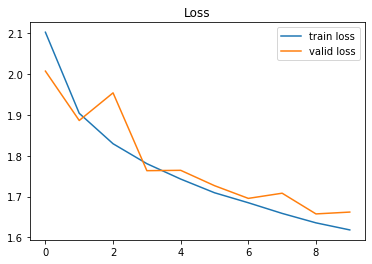

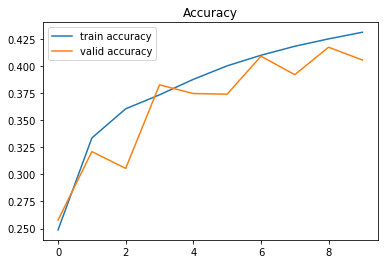

0.43100000001907346 0.4054


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

print(train_acc[-1], valid_acc[-1])